In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# from google.colab import drive
# drive.flush_and_unmount()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
from tensorflow import keras
import seaborn as sns
import random
from keras.models import load_model
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sb
import tensorflow as tf
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sb

In [ ]:
pip install pathlib

In [ ]:
import pathlib

Total images: 2
Total number of classes: 2
Total spotted images: 1004
Total healthy images: 1478


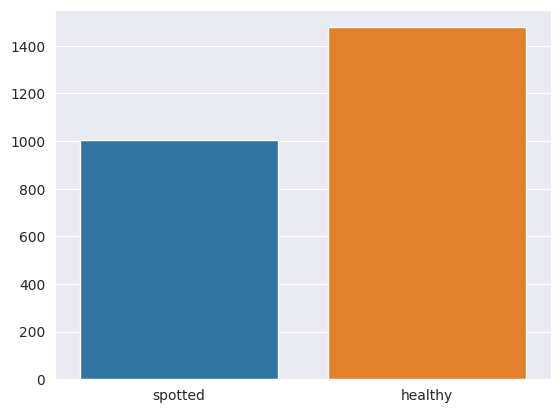

In [ ]:
base_dir = '/content/drive/MyDrive/papperbell'
base_dir = pathlib.Path(base_dir)

spotted = [fn for fn in os.listdir(f'/content/drive/MyDrive/papperbell/Bacterial_spot/')]
healthy = [fn for fn in os.listdir(f'/content/drive/MyDrive/papperbell/healthy/')]
data=[spotted,healthy]
dataset_classes =['spotted','healthy']

image_count = len(list(base_dir.glob('*/*.jpg')))+len(list(base_dir.glob('*/*.png')))
print(f'Total images: {image_count}')
print(f'Total number of classes: {len(dataset_classes)}')
count = 0
data_count = []
for x in dataset_classes:
  print(f'Total {x} images: {len(data[count])}')
  data_count.append(len(data[count]))
  count += 1

sns.set_style('darkgrid')
sns.barplot(x=dataset_classes, y=data_count)
plt.show()

In [ ]:
!pip install split-folders
import splitfolders #to split dataset
import pathlib
base_ds = '/content/drive/MyDrive/papperbell'
base_ds = pathlib.Path(base_ds)
img_height=256
img_width=256
batch_size=32
splitfolders.ratio(base_ds, output='images', seed=1321, ratio=(.8,.1,.1), group_prefix=None)

Copying files: 2482 files [00:42, 58.40 files/s] 


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255,
shear_range = 0.15,
zoom_range = 0.15,
horizontal_flip = True)
train_ds = datagen.flow_from_directory(
    'images/train',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode='categorical',
    shuffle=False)

val_ds = datagen.flow_from_directory(
    'images/val',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode='categorical',
    shuffle=False)

test_ds = datagen.flow_from_directory(
    'images/test',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode='categorical',
    shuffle=False)

Found 1985 images belonging to 2 classes.
Found 247 images belonging to 2 classes.
Found 250 images belonging to 2 classes.


In [ ]:
# len(train_ds.classes)

In [ ]:
def plot_train_history(history):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

# plot_train_history(model_info)

In [ ]:
def plant_prediction(test_image):
  image = img_to_array(test_image)
  image = np.expand_dims(image, axis = 0)
  result = np.argmax(model.predict(image))
  return result

# CNN

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense,Dropout
from keras.layers import BatchNormalization

# Initialising the CNN
classifier = Sequential()
# Step 1 - Adding Convolution layer
classifier.add(Conv2D(32, (3, 3), input_shape = (256,256, 3), activation = 'relu'))

# Step 2 - Adding MaxPooling layers
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 512, activation = 'relu'))
classifier.add(BatchNormalization()),
classifier.add(Dense(256,activation='relu')),
classifier.add(Dropout(0.25)),
classifier.add(Dense(units = 2, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model_info=classifier.fit(train_ds,
steps_per_epoch = int(round(1032/32)),
epochs = 100,
validation_data = val_ds,
validation_steps = int(round(128/32)))

Epoch 1/100
32/32 [==============================] - 168s 5s/step - loss: 0.7898 - accuracy: 0.6143 - val_loss: 1.3024 - val_accuracy: 0.7656
Epoch 2/100
32/32 [==============================] - 148s 5s/step - loss: 0.6022 - accuracy: 0.6992 - val_loss: 11.6385 - val_accuracy: 0.2188
Epoch 3/100
32/32 [==============================] - 140s 4s/step - loss: 0.4294 - accuracy: 0.8228 - val_loss: 3.0758 - val_accuracy: 0.3359
Epoch 4/100
32/32 [==============================] - 147s 5s/step - loss: 0.4597 - accuracy: 0.8232 - val_loss: 6.0765 - val_accuracy: 0.2344
Epoch 5/100
32/32 [==============================] - 147s 5s/step - loss: 0.3763 - accuracy: 0.8564 - val_loss: 2.6589 - val_accuracy: 0.3047
Epoch 6/100
32/32 [==============================] - 145s 5s/step - loss: 0.3047 - accuracy: 0.8872 - val_loss: 11.0866 - val_accuracy: 0.2188
Epoch 7/100
32/32 [==============================] - 145s 5s/step - loss: 0.2106 - accuracy: 0.9386 - val_loss: 1.6360 - val_accuracy: 0.2812
Epoc

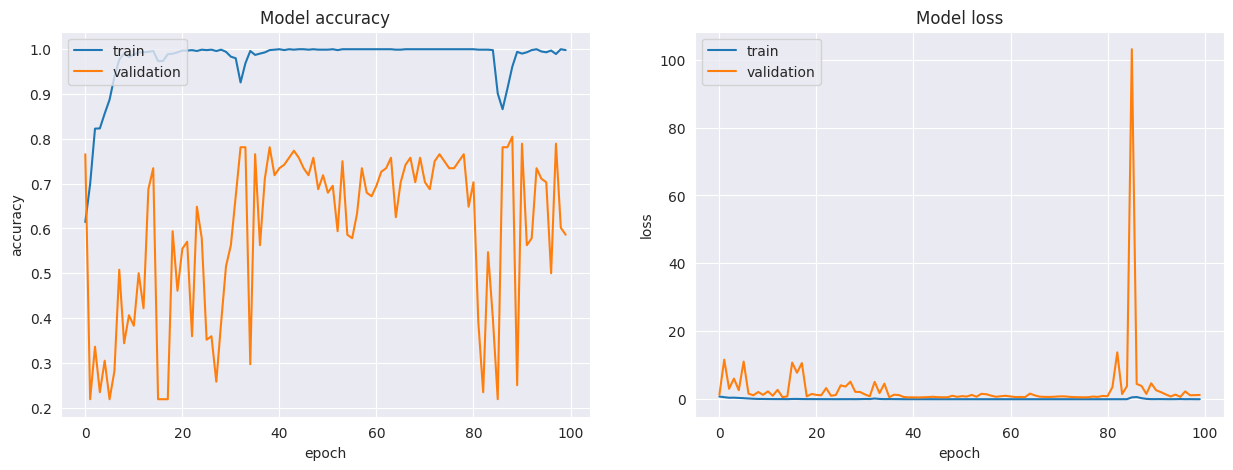

In [ ]:
plot_train_history(model_info)

In [ ]:
classifier.save('/content/drive/MyDrive/papperbell/papperbell_cnn.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model=load_model('/content/drive/MyDrive/papperbell/papperbell_cnn.h5')
print("model loaded")

model loaded


In [ ]:
score=model.evaluate(test_ds)
print("Loss:",score[0],"Accuracy:",score[1])

8/8 [==============================] - 12s 1s/step - loss: 0.9191 - accuracy: 0.6600
Loss: 0.9191427230834961 Accuracy: 0.6600000262260437


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sb

In [ ]:
pred= np.round(model.predict(test_ds, verbose=1))
test_labels=test_ds.labels
test_pred_labels=[]
for i in range(len(pred)):
  test_pred_labels.append(np.argmax(pred[i]))
conf_matrix= confusion_matrix(test_pred_labels,test_labels)
print (conf_matrix)

8/8 [==============================] - 11s 1s/step
[[ 48  33]
 [ 53 116]]


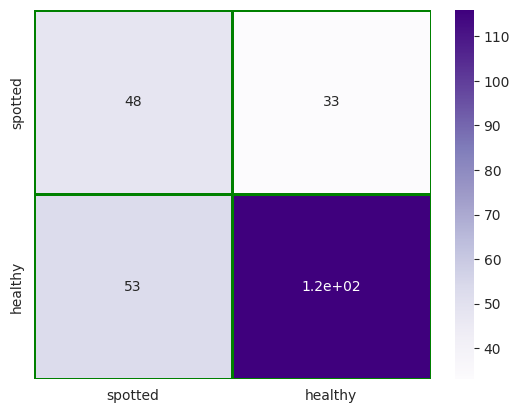

In [ ]:
sb.heatmap(conf_matrix,cmap='Purples', annot=True,xticklabels=['spotted','healthy'],yticklabels=['spotted','healthy'],linewidths=1,
                linecolor='green').plot()
plt.show()

In [ ]:
test_report = classification_report(test_ds.labels,test_pred_labels, target_names=['spotted','healthy'], output_dict=True)
test_df = pd.DataFrame(test_report).transpose()
test_df

,precision,recall,f1-score,support
spotted,0.592593,0.475248,0.527473,101.000
healthy,0.686391,0.778523,0.729560,149.000
accuracy,0.656000,0.656000,0.656000,0.656
macro avg,0.639492,0.626886,0.628516,250.000
weighted avg,0.648496,0.656000,0.647917,250.000


### **resnet_50**

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('best_weights_resnet50.h5', save_best_only=True, save_weights_only=True, monitor='val_accuracy', mode='max', verbose=1)

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, BatchNormalization, Activation, Add
from keras.applications import ResNet50

keras.backend.clear_session()
# Load pre-trained ResNet-50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.25)(x)
predictions = Dense(2, activation='softmax')(x)

# Create the final model
resnet50_model = Model(inputs=base_model.input, outputs=predictions)

# Set the first layers to non-trainable (optional)

# Compile the model
resnet50_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
resnet50_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [ ]:
resnet50_model_info=resnet50_model.fit(train_ds,
steps_per_epoch = int(round(1032/32)),
epochs = 30,
validation_data = val_ds,
validation_steps = int(round(128/32)),
                                       callbacks = [checkpoint])

Epoch 1/30
32/32 [==============================] - ETA: 0s - loss: 1.0589 - accuracy: 0.5750 
Epoch 1: val_accuracy improved from -inf to 0.78125, saving model to best_weights_resnet50.h5
32/32 [==============================] - 998s 30s/step - loss: 1.0589 - accuracy: 0.5750 - val_loss: 1801.9348 - val_accuracy: 0.7812
Epoch 2/30
32/32 [==============================] - ETA: 0s - loss: 1.1482 - accuracy: 0.4028 
Epoch 2: val_accuracy did not improve from 0.78125
32/32 [==============================] - 963s 30s/step - loss: 1.1482 - accuracy: 0.4028 - val_loss: 359204.4062 - val_accuracy: 0.7812
Epoch 3/30
32/32 [==============================] - ETA: 0s - loss: 0.8869 - accuracy: 0.4814 
Epoch 3: val_accuracy did not improve from 0.78125
32/32 [==============================] - 964s 30s/step - loss: 0.8869 - accuracy: 0.4814 - val_loss: 2295.3748 - val_accuracy: 0.7812
Epoch 4/30
32/32 [==============================] - ETA: 0s - loss: 0.8155 - accuracy: 0.5508 
Epoch 4: val_accurac

In [ ]:
import torch
import torchvision
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torch import nn

In [ ]:
pip install --upgrade torch torchvision

In [ ]:
data_transform = transforms.Compose([
    transforms.Resize(384),  # Resize the image to a consistent size
    transforms.CenterCrop(384),  # Crop the image to the center
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
dataset = ImageFolder(root='/content/gdrive/MyDrive/papperbell', transform=data_transform)

In [ ]:
data_loader = DataLoader(dataset, batch_size=32, shuffle=True)

In [ ]:
model = torchvision.models.vit_b_32(pretrained=True)

In [ ]:
model.head = nn.Identity()

In [ ]:
model.eval()

VisionTransformer(
  (conv_proj): Conv2d(3, 768, kernel_size=(32, 32), stride=(32, 32))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_a

In [ ]:
def predict_batch(images):
    with torch.no_grad():
        outputs = model(images)
        _, predicted = outputs.max(1)
    return predicted




In [ ]:
# Iterate through the dataset and make predictions
for batch_idx, (images, labels) in enumerate(data_loader):
    predicted_labels = predict_batch(images)
    # You can do further processing or analysis with the predicted_labels here
    print(f"Batch {batch_idx}, Predicted Labels: {predicted_labels}, True Labels: {labels}")

## **InceptionV3**

In [ ]:
from keras.applications import InceptionV3
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from keras.callbacks import ModelCheckpoint

keras.backend.clear_session()

# Load pre-trained InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Add custom top layers
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(2, activation='softmax'))

# Set the first layers to non-trainable (optional)
for layer in model.layers[0].layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define a ModelCheckpoint callback
checkpoint = ModelCheckpoint('best_weights.h5', save_best_only=True, save_weights_only=True, monitor='val_loss', mode='min', verbose=1)

# Train the model with the callback

inception = model.fit(train_ds, epochs= 100,steps_per_epoch = int(round(1032/32)),
 validation_data=val_ds,validation_steps = int(round(128/32)), callbacks=[checkpoint])

# Load the best weights
model.load_weights('best_weights.h5')

# Summary of the model
model.summary()

Epoch 1/100
32/32 [==============================] - ETA: 0s - loss: 0.6397 - accuracy: 0.6875
Epoch 1: val_loss improved from inf to 0.79397, saving model to best_weights.h5
32/32 [==============================] - 240s 7s/step - loss: 0.6397 - accuracy: 0.6875 - val_loss: 0.7940 - val_accuracy: 0.4922
Epoch 2/100
32/32 [==============================] - ETA: 0s - loss: 0.3270 - accuracy: 0.8672
Epoch 2: val_loss improved from 0.79397 to 0.46981, saving model to best_weights.h5
32/32 [==============================] - 228s 7s/step - loss: 0.3270 - accuracy: 0.8672 - val_loss: 0.4698 - val_accuracy: 0.7969
Epoch 3/100
32/32 [==============================] - ETA: 0s - loss: 0.2751 - accuracy: 0.8945
Epoch 3: val_loss did not improve from 0.46981
32/32 [==============================] - 228s 7s/step - loss: 0.2751 - accuracy: 0.8945 - val_loss: 2.0565 - val_accuracy: 0.3359
Epoch 4/100
32/32 [==============================] - ETA: 0s - loss: 0.1552 - accuracy: 0.9346
Epoch 4: val_loss d

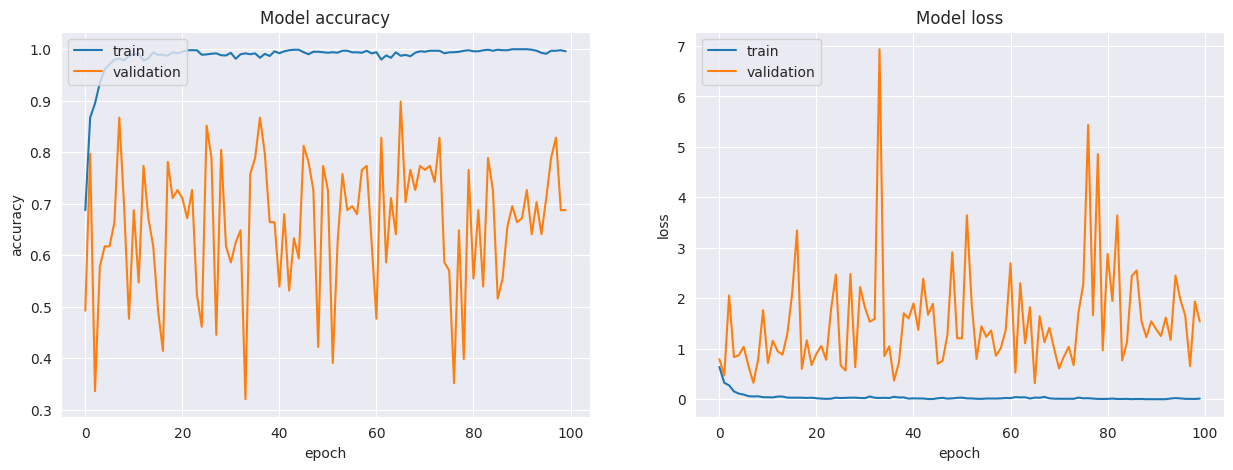

In [ ]:
plot_train_history(inception)

In [ ]:
score=model.evaluate(test_ds)
print("Loss:",score[0],"Accuracy:",score[1])

8/8 [==============================] - 45s 6s/step - loss: 0.7843 - accuracy: 0.8000
Loss: 0.7843151688575745 Accuracy: 0.800000011920929


In [ ]:
pred= np.round(model.predict(test_ds, verbose=1))
test_labels=test_ds.labels
test_pred_labels=[]
for i in range(len(pred)):
  test_pred_labels.append(np.argmax(pred[i]))
conf_matrix= confusion_matrix(test_pred_labels,test_labels)
print (conf_matrix)

8/8 [==============================] - 48s 6s/step
[[ 95  46]
 [  6 103]]


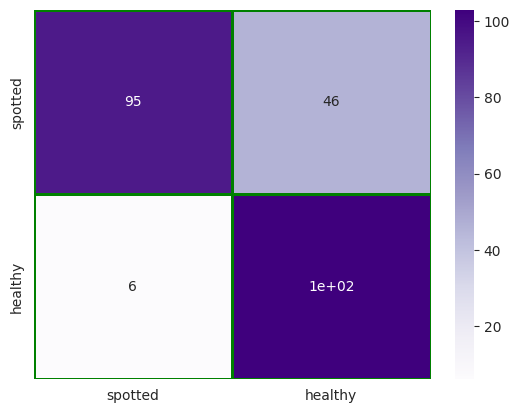

In [ ]:
sb.heatmap(conf_matrix,cmap='Purples', annot=True,xticklabels=['spotted','healthy'],yticklabels=['spotted','healthy'],linewidths=1,
                linecolor='green').plot()
plt.show()

In [ ]:
test_report = classification_report(test_ds.labels,test_pred_labels, target_names=['spotted','healthy'], output_dict=True)
test_df = pd.DataFrame(test_report).transpose()
test_df

,precision,recall,f1-score,support
spotted,0.673759,0.940594,0.785124,101.000
healthy,0.944954,0.691275,0.798450,149.000
accuracy,0.792000,0.792000,0.792000,0.792
macro avg,0.809356,0.815935,0.791787,250.000
weighted avg,0.835391,0.792000,0.793066,250.000


## **mobileNetV2**

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('best_weights_MobileNetV2.h5', save_best_only=True, save_weights_only=True, monitor='val_accuracy', mode='max', verbose=1)

In [ ]:
from keras.applications import MobileNetV2
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
keras.backend.clear_session()
# Load pre-trained MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Add custom top layers
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(2, activation='softmax'))

# Set the first layers to non-trainable (optional)
for layer in model.layers[0].layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


9406464/9406464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 8, 8, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 256)               1313

In [ ]:
mobilenet_v2_model_info=model.fit(train_ds,
steps_per_epoch = int(round(1032/32)),
epochs = 100,
validation_data = val_ds,
validation_steps = int(round(128/32)),
                                  callbacks = [checkpoint])

Epoch 1/100
32/32 [==============================] - ETA: 0s - loss: 0.7029 - accuracy: 0.6636
Epoch 1: val_accuracy improved from -inf to 0.53906, saving model to best_weights_MobileNetV2.h5
32/32 [==============================] - 84s 2s/step - loss: 0.7029 - accuracy: 0.6636 - val_loss: 0.6500 - val_accuracy: 0.5391
Epoch 2/100
32/32 [==============================] - ETA: 0s - loss: 0.2784 - accuracy: 0.8882
Epoch 2: val_accuracy improved from 0.53906 to 0.71094, saving model to best_weights_MobileNetV2.h5
32/32 [==============================] - 74s 2s/step - loss: 0.2784 - accuracy: 0.8882 - val_loss: 0.5909 - val_accuracy: 0.7109
Epoch 3/100
32/32 [==============================] - ETA: 0s - loss: 0.1427 - accuracy: 0.9617
Epoch 3: val_accuracy improved from 0.71094 to 0.75781, saving model to best_weights_MobileNetV2.h5
32/32 [==============================] - 76s 2s/step - loss: 0.1427 - accuracy: 0.9617 - val_loss: 0.4170 - val_accuracy: 0.7578
Epoch 4/100
32/32 [============

In [ ]:
score=model.evaluate(test_ds)
print("Loss:",score[0],"Accuracy:",score[1])

8/8 [==============================] - 17s 2s/step - loss: 2.3347 - accuracy: 0.6160
Loss: 2.3346776962280273 Accuracy: 0.6159999966621399


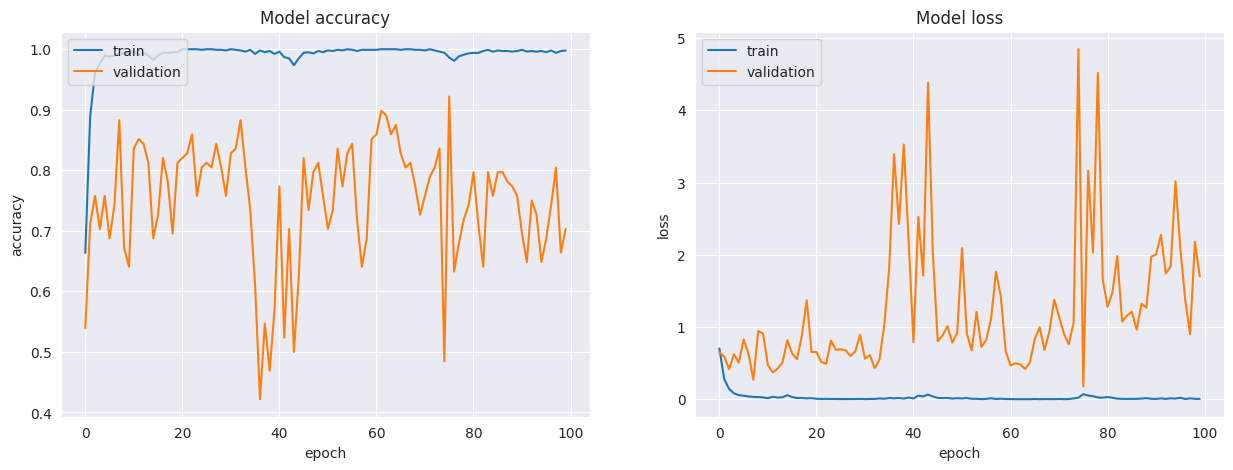

In [ ]:
plot_train_history(mobilenet_v2_model_info)

In [ ]:
pred= np.round(model.predict(test_ds, verbose=1))
test_labels=test_ds.labels
test_pred_labels=[]
for i in range(len(pred)):
  test_pred_labels.append(np.argmax(pred[i]))
conf_matrix= confusion_matrix(test_pred_labels,test_labels)
print (conf_matrix)

8/8 [==============================] - 22s 3s/step
[[73 68]
 [28 81]]


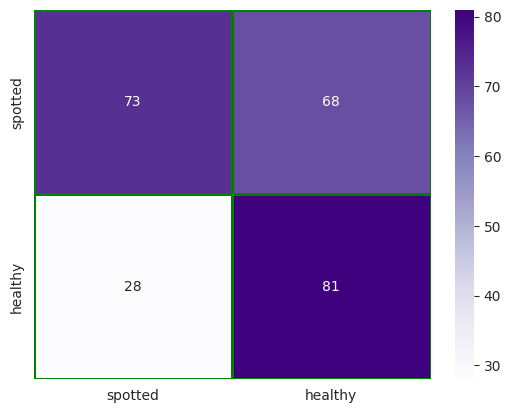

In [ ]:
sb.heatmap(conf_matrix,cmap='Purples', annot=True,xticklabels=['spotted','healthy'],yticklabels=['spotted','healthy'],linewidths=1,
                linecolor='green').plot()
plt.show()

In [ ]:
test_report = classification_report(test_ds.labels,test_pred_labels, target_names=['spotted','healthy'], output_dict=True)
test_df = pd.DataFrame(test_report).transpose()
test_df

,precision,recall,f1-score,support
spotted,0.517730,0.722772,0.603306,101.000
healthy,0.743119,0.543624,0.627907,149.000
accuracy,0.616000,0.616000,0.616000,0.616
macro avg,0.630425,0.633198,0.615606,250.000
weighted avg,0.652062,0.616000,0.617968,250.000
